In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Aquifer_Petrignano

In [3]:
data_auser= pd.read_csv('Aquifer_Petrignano.csv')
data_auser.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [4]:
data_auser.shape

(5223, 8)

In [5]:
data_auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [6]:
data_auser.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [7]:
data_auser.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [8]:
import missingno as msno
msno.bar(data_auser)


ModuleNotFoundError: No module named 'missingno'

In [ ]:
msno.heatmap(data_auser)

In [9]:
from datetime import datetime,date
data_auser['Date']=pd.to_datetime(data_auser['Date'])

C:\Users\44791\AppData\Local\Temp\ipykernel_22008\2304493872.py:2: UserWarning: Parsing '14/03/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data_auser['Date']=pd.to_datetime(data_auser['Date'])
C:\Users\44791\AppData\Local\Temp\ipykernel_22008\2304493872.py:2: UserWarning: Parsing '15/03/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data_auser['Date']=pd.to_datetime(data_auser['Date'])
C:\Users\44791\AppData\Local\Temp\ipykernel_22008\2304493872.py:2: UserWarning: Parsing '16/03/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data_auser['Date']=pd.to_datetime(data_auser['Date'])
C:\Users\44791\AppData\Local\Temp\ipykernel_22008\2304493872.py:2: UserWarning: Parsing '17/03/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data_auser['Date']=pd.to_datet

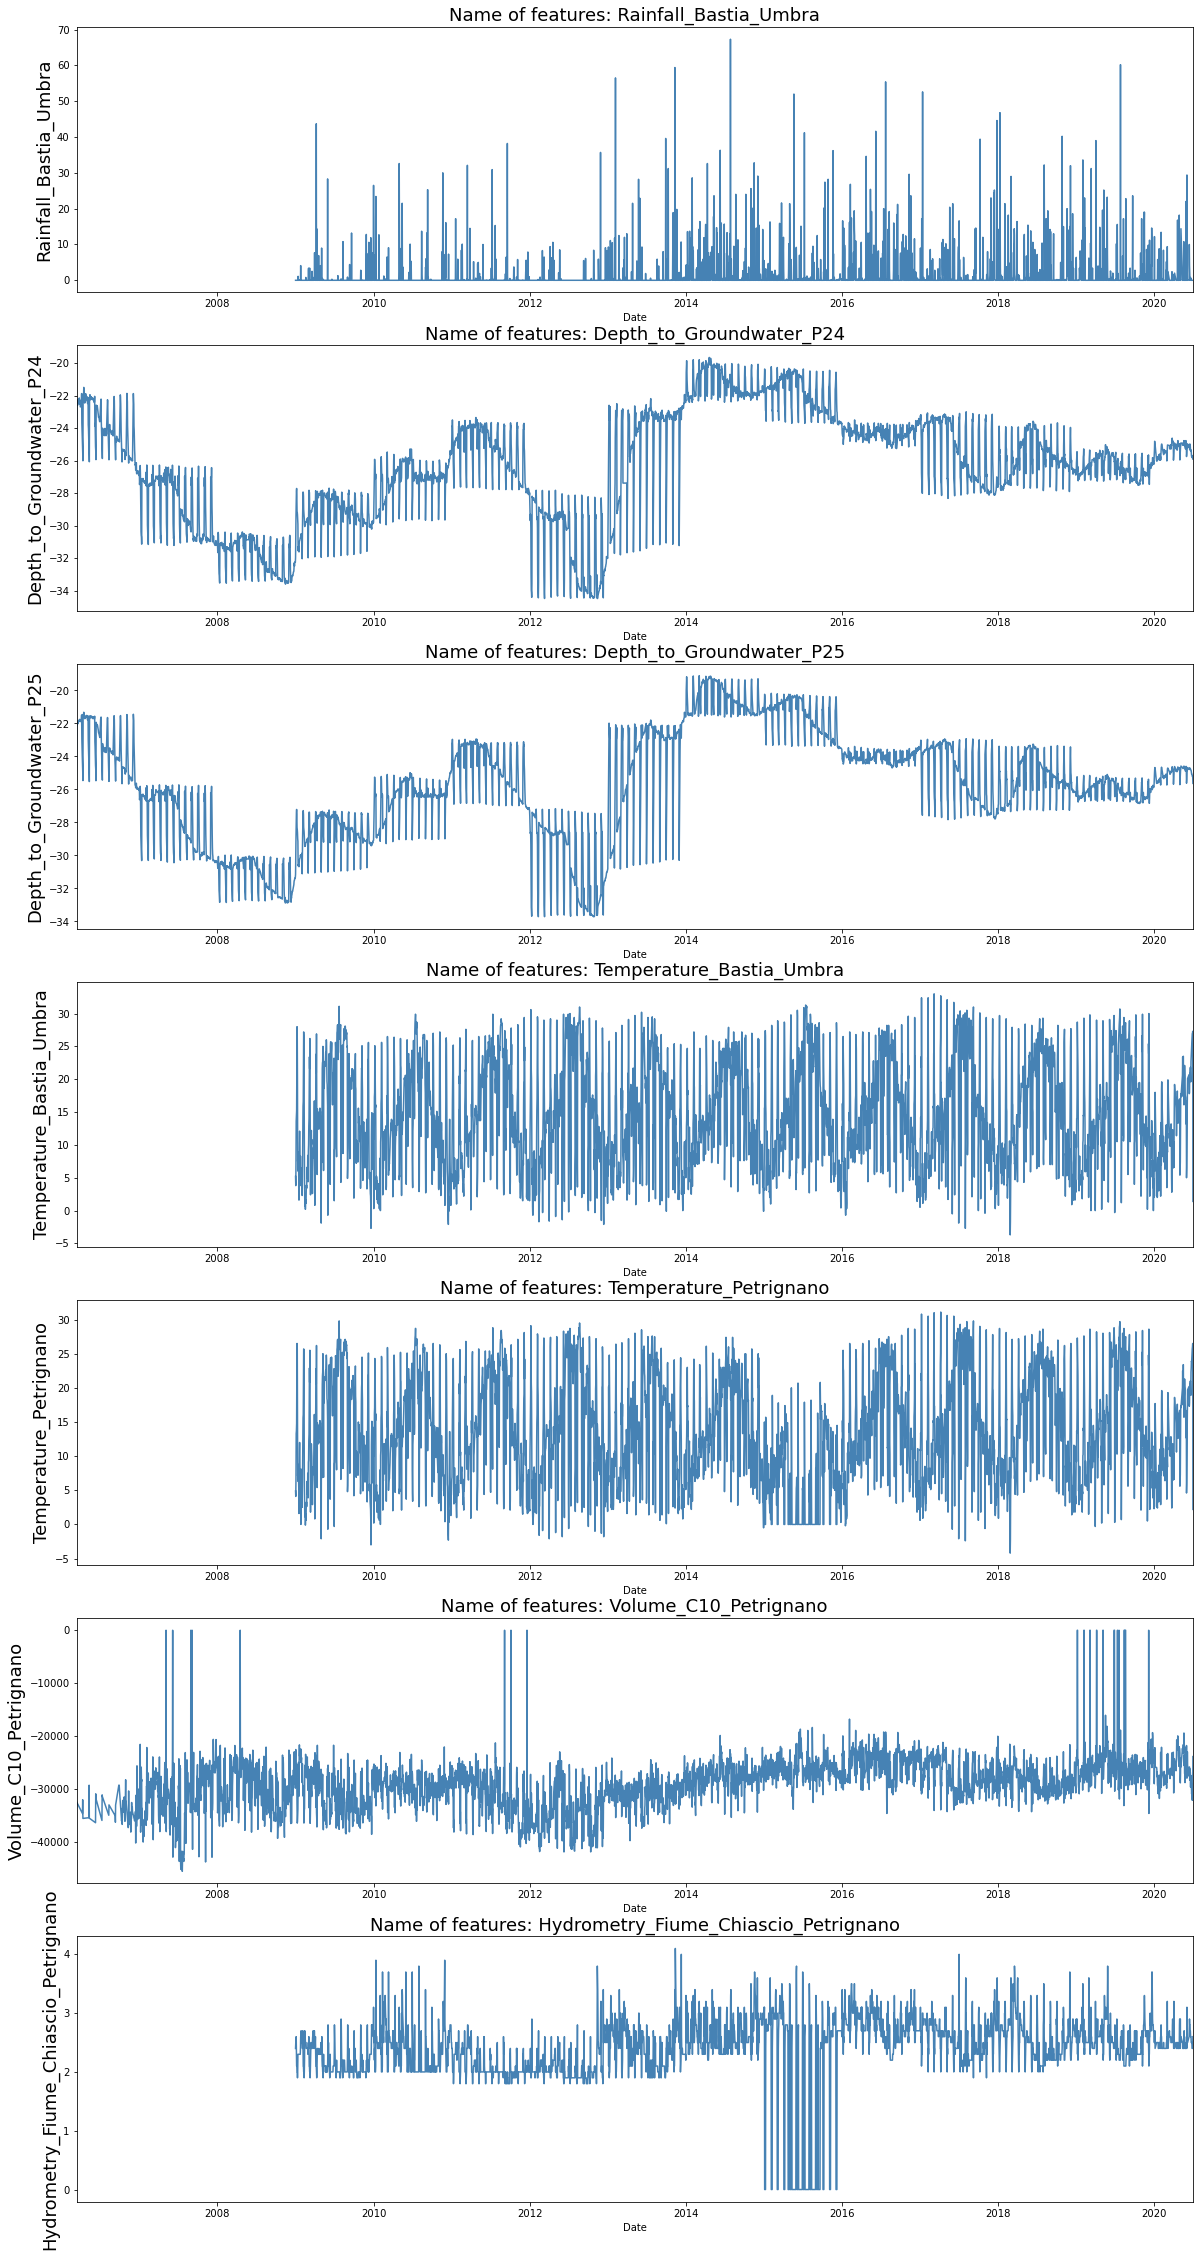

In [10]:
f, ax = plt.subplots(nrows=7, ncols=1, figsize=(20, 40))

for i, c in enumerate(data_auser.drop('Date', axis=1).columns):
    sns.lineplot(x=data_auser['Date'], y=data_auser[c].fillna(method='ffill'), ax=ax[i], color='steelblue')
    ax[i].set_title('Name of features: {}'.format(c), fontsize=18)
    ax[i].set_ylabel(ylabel=c, fontsize=18)                
    ax[i].set_xlim([date(2006, 3, 14), date(2020, 6, 30)]) 

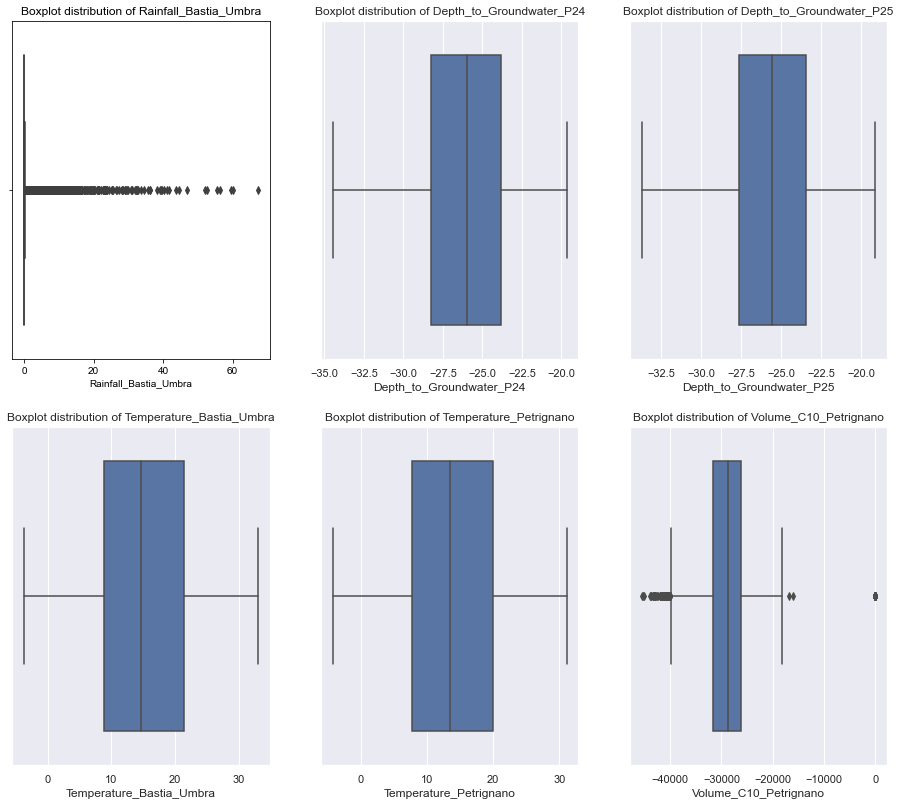

In [11]:
num_cols=data_auser.select_dtypes(include=float)

plt.figure(figsize=(18,9))
for i,j in zip(range(1, 7),num_cols):
    plt.subplot(3, 3, i)
    plt.subplots_adjust(right=0.8,top=1.9)
    sns.boxplot(data=data_auser, x=j)
    sns.set_theme()
    plt.title('Boxplot distribution of {}'.format(j))

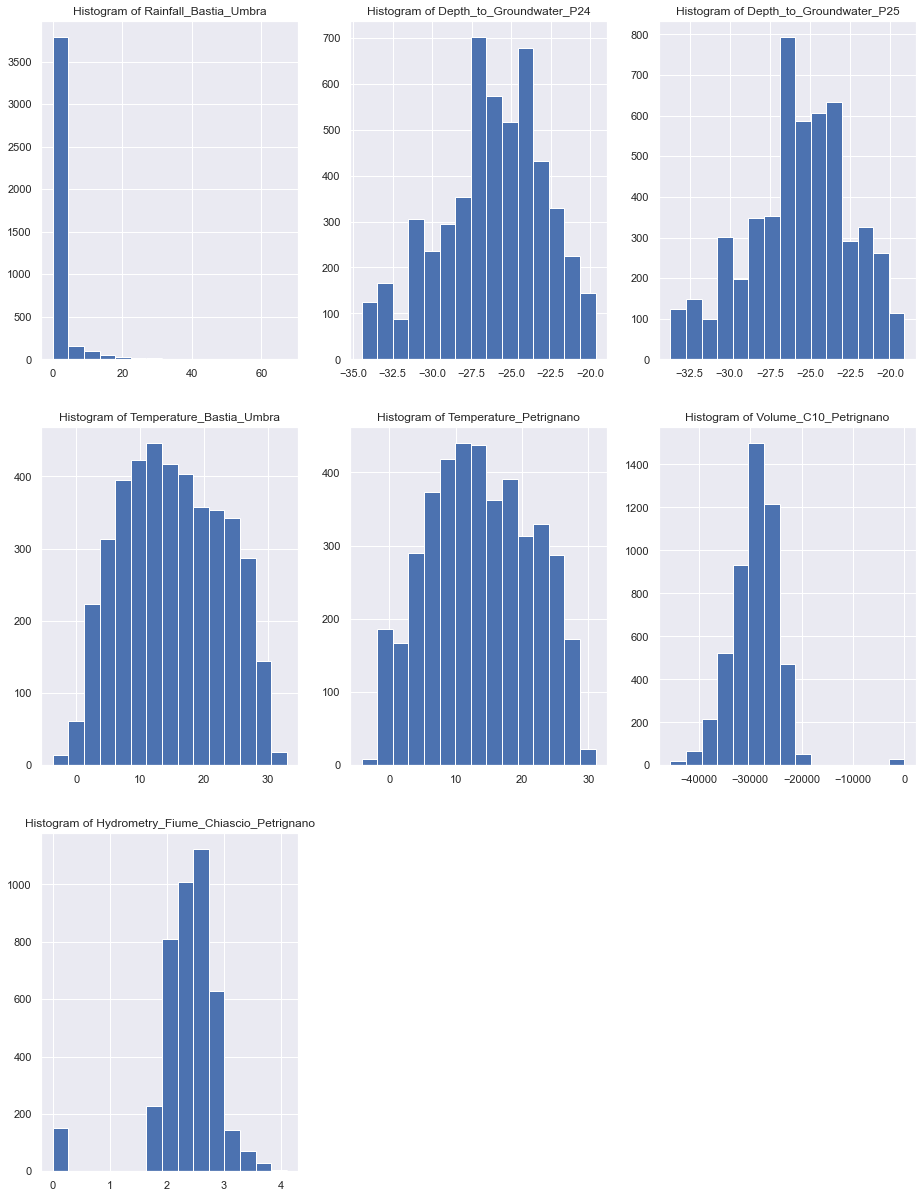

In [12]:
plt.figure(figsize=(18,9))
for i,j in zip(range(1, 18),num_cols):
    plt.subplot(3, 3, i)
    plt.subplots_adjust(right=0.8,top=1.9)
    plt.hist(data_auser[j], bins = 15)
    plt.title('Histogram of {}'.format(j))

In [13]:
# filling the misssing values with backward filling technque
data_auser = data_auser.ffill().bfill()

In [14]:
data_auser.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,0.0,-22.48,-22.18,5.2,4.9,-29281.824,2.4
1,2006-03-15,0.0,-22.38,-22.14,5.2,4.9,-29281.824,2.4
2,2006-03-16,0.0,-22.25,-22.04,5.2,4.9,-29281.824,2.4
3,2006-03-17,0.0,-22.38,-22.04,5.2,4.9,-29281.824,2.4
4,2006-03-18,0.0,-22.60,-22.04,5.2,4.9,-29281.824,2.4


In [15]:
data_auser.tail()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
5218,2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,2020-06-29,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4
5222,2020-06-30,0.0,-25.91,-25.25,27.3,26.5,-31878.144,2.4


In [16]:
training=(data_auser['Date'] >= '2006-03-14') & (data_auser['Date'] <= '2020-01-30')
train = data_auser.loc[training]

train.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,0.0,-22.48,-22.18,5.2,4.9,-29281.824,2.4
1,2006-03-15,0.0,-22.38,-22.14,5.2,4.9,-29281.824,2.4
2,2006-03-16,0.0,-22.25,-22.04,5.2,4.9,-29281.824,2.4
3,2006-03-17,0.0,-22.38,-22.04,5.2,4.9,-29281.824,2.4
4,2006-03-18,0.0,-22.60,-22.04,5.2,4.9,-29281.824,2.4


In [17]:
testing=(data_auser['Date'] >= '2020-03-01') & (data_auser['Date'] <= '2020-06-30')
test = data_auser.loc[testing]

In [18]:
train=train.drop(['Date'], axis = 1)
test=test.drop(['Date'], axis = 1)

In [19]:
train.head()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,0.0,-22.48,-22.18,5.2,4.9,-29281.824,2.4
1,0.0,-22.38,-22.14,5.2,4.9,-29281.824,2.4
2,0.0,-22.25,-22.04,5.2,4.9,-29281.824,2.4
3,0.0,-22.38,-22.04,5.2,4.9,-29281.824,2.4
4,0.0,-22.60,-22.04,5.2,4.9,-29281.824,2.4


In [20]:
features = train.loc[:, train.columns != 'Depth_to_Groundwater_P25']
target= train['Depth_to_Groundwater_P25'] 

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(features,target, test_size=0.25)

# Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
lm.coef_

array([-9.61218955e-04,  9.84181907e-01, -6.66192727e-03,  7.15641950e-03,
       -2.40227613e-05, -9.44458186e-02])

In [24]:
pd.DataFrame(lm.coef_, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Depth_to_Groundwater_P24,0.984182
Temperature_Petrignano,0.007156
Volume_C10_Petrignano,-0.000024
Rainfall_Bastia_Umbra,-0.000961
Temperature_Bastia_Umbra,-0.006662
Hydrometry_Fiume_Chiascio_Petrignano,-0.094446


In [25]:
pred = lm.predict(X_test)

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
4202,-26.53,-26.486324
4186,-26.61,-26.594809
4562,-25.02,-24.871047
1869,-22.94,-22.982369
2400,-33.51,-33.209254
...,...,...
4875,-25.94,-25.799538
714,-30.76,-30.695817
2443,-32.89,-33.273764
3066,-20.42,-21.026772


In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.16086185690659674
Mean Squared Error: 0.04484445755315646
Root Mean Squared Error: 0.21176509994131815


# Random forest regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(oob_score = True,n_jobs =3,random_state =7,
                              max_features = "auto", min_samples_leaf =4)

model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=4, n_jobs=3, oob_score=True,
                      random_state=7)

In [29]:
model.feature_importances_

array([2.33715652e-05, 9.96972168e-01, 3.02730365e-04, 6.12268204e-04,
       1.34655679e-03, 7.42905336e-04])

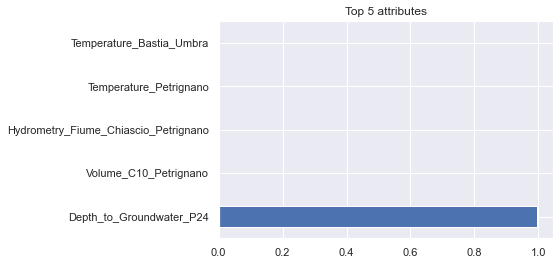

In [30]:
f=pd.Series(model.feature_importances_,index=features.columns)
f.nlargest(5).plot(kind='barh')
plt.title("Top 5 attributes")
plt.show()

In [31]:
pred2=model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': pred2})
df

,Actual,Predicted
4202,-26.53,-26.532023
4186,-26.61,-26.584863
4562,-25.02,-24.999508
1869,-22.94,-23.058213
2400,-33.51,-33.474114
...,...,...
4875,-25.94,-25.840763
714,-30.76,-30.695956
2443,-32.89,-33.098368
3066,-20.42,-20.561973


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

Mean Absolute Error: 0.08502022788349425
Mean Squared Error: 0.014066266526932604
Root Mean Squared Error: 0.11860129226501963


In [33]:
#hyperparamter tunning
from sklearn.model_selection import RandomizedSearchCV as RSC

In [34]:
ne = [int(x) for x in np.linspace(start = 100, stop = 1400, num = 10)]
md = [int(x) for x in np.linspace(10, 110, num = 11)]
md.append(None)
mss = [2, 6, 10]
msl = [1, 2, 4]


params = {'n_estimators': ne,
               'max_depth': md,
               'min_samples_split': mss,
               'min_samples_leaf': msl}

In [ ]:
model_new = RSC(estimator = model, param_distributions = params, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
model_new.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


exception calling callback for <Future at 0x2af2d3b5430 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\44791\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\44791\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\44791\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\44791\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\44791\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\44791\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))


In [ ]:
model_new.best_params_

In [ ]:
model = RandomForestRegressor(**model_new.best_params_)
model.fit(X_train,y_train)

In [ ]:
pred2=model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

# Lasso regression


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001)
model.fit(X_train,y_train)

In [ ]:
pred3=model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': pred3})
df

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

# ARIMA model

In [ ]:
test = data_auser['Depth_to_Groundwater_P25'].values

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(test); axes[0, 0].set_title('Original Series')
plot_acf(test, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(test)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(test), ax=axes[1, 1])
diffval = np.diff(test)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(test, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
# Forecast
n_periods = 120
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(test), len(test)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(test)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Predicting the ground water availability")
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(fc, index_of_fc))
print('Mean Squared Error:', metrics.mean_squared_error(fc, index_of_fc))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(fc, index_of_fc)))